# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2: Линейные модели


###### <hr\>
**Общая информация**

**Срок сдачи:** 05 апреля 18:00 Сдача **очная** на онлайн занятии. <br\>


Используйте данный Ipython Notebook при оформлении домашнего задания.

Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0920, Задание 2] Фамилия Имя.



**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw2.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. В противном случае -1 балл
<hr\>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

In [2]:
%load_ext pycodestyle_magic

In [ ]:
%flake8_on

In [3]:
import warnings
warnings.filterwarnings('ignore')

Здравствуйте, уважаемые студенты! 

В этом задании мы будем реализовать линейные модели. Необходимо реализовать линейную и логистическую регрессии с L2 регуляризацией

# Теоретическое введение



Линейная регрессия решает задачу регрессии и оптимизирует функцию потерь MSE 

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right], $$ где $y_i$ $-$ целевая функция,  $a_i = a(x_i) =  \langle\,x_i,w\rangle ,$ $-$ предсказание алгоритма на объекте $x_i$, $w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Не забываем, что здесь и далее  мы считаем, что в $x_i$ есть тождественный вектор единиц, ему соответствует вес $w_0$.


Логистическая регрессия является линейным классификатором, который оптимизирует так называемый функционал log loss:

$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right],$$
где  $y_i  \in \{0,1\}$ $-$ метка класса, $a_i$ $-$ предсказание алгоритма на объекте $x_i$. Модель пытается предсказать апостериорую вероятность объекта принадлежать к классу "1":
$$ p(y_i = 1 | x_i) = a(x_i) =  \sigma( \langle\,x_i,w\rangle ),$$
$w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Функция $\sigma(x)$ $-$ нелинейная функция, пероводящее скалярное произведение объекта на веса в число $\in (0,1)$ (мы же моделируем вероятность все-таки!)

$$\sigma(x) = \frac{1}{1 + \exp(-x)}$$

Если внимательно посмотреть на функцию потерь, то можно заметить, что в зависимости от правильного ответа алгоритм штрафуется или функцией $-\log a_i$, или функцией $-\log (1 - a_i)$.



Часто для решения проблем, которые так или иначе связаны с проблемой переобучения, в функционал качества добавляют слагаемое, которое называют ***регуляризацией***. Итоговый функционал для линейной регрессии тогда принимает вид:

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] + \frac{1}{C}R(w) $$

Для логистической: 
$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$

Самое понятие регуляризации введено основателем ВМК академиком Тихоновым https://ru.wikipedia.org/wiki/Метод_регуляризации_Тихонова

Идейно методика регуляризации заключается в следующем $-$ мы рассматриваем некорректно поставленную задачу (что это такое можно найти в интернете), для того чтобы сузить набор различных вариантов (лучшие из которых будут являться переобучением ) мы вводим дополнительные ограничения на множество искомых решений. На лекции Вы уже рассмотрели два варианта регуляризации.

$L1$ регуляризация:
$$R(w) = \sum_{j=1}^{D}|w_j|$$
$L2$ регуляризация:
$$R(w) =  \sum_{j=1}^{D}w_j^2$$

С их помощью мы ограничиваем модель в  возможности выбора каких угодно весов минимизирующих наш лосс, модель уже не сможет подстроиться под данные как ей угодно. 

Вам нужно добавить соотвествущую Вашему варианту $L2$ регуляризацию.

И так, мы поняли, какую функцию ошибки будем минимизировать, разобрались, как получить предсказания по объекту и обученным весам. Осталось разобраться, как получить оптимальные веса. Для этого нужно выбрать какой-то метод оптимизации.



Градиентный спуск является самым популярным алгоритмом обучения линейных моделей. В этом задании Вам предложат реализовать стохастический градиентный спуск или  мини-батч градиентный спуск (мини-батч на русский язык довольно сложно перевести, многие переводят это как "пакетный", но мне не кажется этот перевод удачным). Далее нам потребуется определение **эпохи**.
Эпохой в SGD и MB-GD называется один проход по **всем** объектам в обучающей выборки.
* В SGD градиент расчитывается по одному случайному объекту. Сам алгоритм выглядит примерно так:
        1) Перемешать выборку
        2) Посчитать градиент функции потерь на одном объекте (далее один объект тоже будем называть батчем)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* В Mini Batch SGD - по подвыборке объектов. Сам алгоритм выглядит примерно так::
        1) Перемешать выборку, выбрать размер мини-батча (от 1 до размера выборки)
        2) Почитать градиент функции потерь по мини-батчу (не забыть поделить на  число объектов в мини-батче)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* Для отладки алгоритма реализуйте возможность  вывода средней ошибки на обучении модели по объектам (мини-батчам). После шага градиентного спуска посчитайте значение ошибки на объекте (или мини-батче), а затем усредните, например, по ста шагам. Если обучение проходит корректно, то мы должны увидеть, что каждые 100 шагов функция потерь уменьшается. 
* Правило останова - максимальное количество эпох
    


# Теоретические вопросы (2 балла)
В этой части Вам будут предложены теоретичские вопросы и задачи по теме. Вы, конечно, можете списать их у своего товарища или найти решение в интернете, но учтите, что они обязательно войдут в теоретический коллоквиум. Лучше разобраться в теме сейчас и успешно ответить на коллоквиуме, чем списать, не разобравшись в материале, и быть терзаемым совестью. 


Формулы надо оформлять в формате **LaTeX**.

Задача 1. Градиент для линейной регрессии.
* Выпишите формулу обновления весов для линейной регрессии с L2 регуляризацией для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент?

***Ваше решение здесь***

$$ w_{new} = w_{old} - a\nabla_{w}Q(w_{old}) = w_{old} + a\frac{1}{N} \sum_i 2x_i (y_i - \langle x_i, w \rangle) - a\frac{1}{C}\sum_{j=1}^{D} 2w_j$$
Матрично: $$ w_{new} = w_{old} - \frac{2a}{N} X^T_{n} (X_n * w_{old} - y_n) - \frac{2a}{C} w_{old} $$
Градиент соответствует изменению функции потерь и изменению весов -- если градиент уменьшается, то уменьшается функция потерь (что и нужно) и/или веса модели (не хотим удаляться от собственного представления правильного ответа).

---

Задача 2. Градиент для логистической регрессии.
* Выпишите формулу обновления весов для логистической регрессии с L2 регуляризацией  для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент? Как соотносится этот градиент с градиентом, возникающий в задаче линейной регрессии?

Подсказка: Вам градиент, которой получается если “в лоб” продифференцировать,  надо немного преобразовать.
Надо подставить, что $1 - \sigma(w,x) $ это  $1 - a(x_i)$, а  $-\sigma(w,x)$ это $0 - a(x_i)$.  Тогда получится свести к одной красивой формуле с линейной регрессией, которую программировать будет намного проще.

***Ваше решение здесь***

$$ w_{new} = w_{old} - a\nabla_{w}Q(w_{old}) = w_{old} - a \frac{1}{N} \sum_i x_i(\sigma (\langle x_i, w\rangle) - y_i) - a\frac{1}{C} \sum_{j=1}^{D}2w_j $$
Матрично: $$ w_{new} = w_{old} - \frac{a}{N} X^T_n (\sigma (X_n * w_{old}) - y) - \frac{2a}{C} w_{old} $$
Градиент соответствует изменению функции потерь и изменению весов. Если градиент уменьшается, то уменьшается ошибка (что и нужно, причем штраф либо $-\log a_i$, либо $-\log (1 - a_i) $ в зависимости от правильного ответа) и/или уменьшаются веса модели (аналогично задаче 1).

---

Задача 3. Точное решение линейной регрессии

На лекции было показано, что точное решение линейной регрессии имеет вид $w = (X^TX)^{-1}X^TY $. 
* Покажите, что это действительно является точкой минимума в случае, если матрица X имеет строк не меньше, чем столбцов и имеет полный ранг. Подсказка: посчитайте Гессиан и покажите, что в этом случае он положительно определен. 
* Выпишите точное решение для модели с $L2$ регуляризацией. Как L2 регуляризация помогает с точным решением где матрица X имеет линейно зависимые признаки?

***Ваше решение здесь***

1) Нужно показать, что Гессиан положительно определен. На лекции получили, что $ \nabla_{w} Q(w) = \frac{2}{N} X^T (Xw - y) $. Вспомним канонические формы первой и второй производной, выражаемые через градиент и Гессиан соответственно: $$ d_{w}Q(w) = [\nabla_{w} Q(w)]^T dw_{1},\quad d_{w}^2Q(w) = [dw_{1}]^T [\nabla_{w}^2 Q(w)] dw_{2}. $$
Подсчитаем:
$$ d_{w} Q(w) = [\nabla_{w} Q(w)]^T dw_{1} = [\frac{2}{N} X^T (Xw - y)]^T dw_{1} = \frac{2}{N} (Xw - y)^T X dw_{1} \Rightarrow $$
$$ d_{w}^2 Q(w) = d_{w} (\frac{2}{N} (Xw - y)^T X dw_{1}) = \frac{2}{N} d_{w} ((Xw-y)^T) X^T dw_{1} = \frac{2}{N}(X dw_{2})^T X dw_{1} = \frac{2}{N}(dw_{2})^T X^TX dw_{1} \Rightarrow $$
$$ \nabla_{w}^2 Q(w) = \frac{2}{N}X^T X$$
$$ \forall z: z^T (X^T X) z = (z^TX^T) Xz = [Xz]^T[Xz] > 0 \Rightarrow$$
матрица положительно определенная по определению, ***ч.т.д.*** <br>
2) $ Q(w) = \frac{1}{N} || Xw-y ||^2 + a || w ||^2 $. Посчитав решение аналогично лекции, получим точное решение:
$$ w = (X^TX + \frac{N}{C} I)^{-1} - X^Ty$$
Если в матрице есть ЛЗ признаки, то матрица $X^TX$ вырождена и необратима; добавив же определенное $\lambda I$, можно эту матрицу обратить, и решение будет существовать.

---

Задача 4.  Предсказываем вероятности.

Когда говорят о логистической регрессии, произносят фразу, что она "предсказывает вероятности положительного класса". Давайте разберемся, что же за этим стоит. Посчитаем математическое ожидание функции потерь и проверим, что предсказание алгоритма, оптимизирующее это мат. ожидание, будет являться вероятностью положительного класса. 

И так, функция потерь на объекте $x_i$, который имеет метку $y_i \in \{0,1\}$  для предсказания $a(x_i)$ равна:
$$L(y_i, b) =-[y_i == 1] \log a(x_i)  - [y_i == 0] \log(1 - a(x_i)) $$

Где $[]$ означает индикатор $-$ он равен единице, если значение внутри него истинно, иначе он равен нулю. Тогда мат. ожидание при условии конкретного $x_i$  по определение мат. ожидания дискретной случайной величины:
$$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i))$$
* Докажите, что значение $a(x_i)$, минимизирующее данное мат. ожидание, в точности равно $p(y_i = 1 |x_i)$, то есть равно вероятности положительного класса.

Подсказка: возможно, придется воспользоваться, что  $p(y_i = 1 | x_i) + p(y_i = 0 | x_i) = 1$

***Ваше решение здесь***

Преобразуем:
$$ E(L|x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i)) = -p(y_i = 1 |x_i ) \log a(x_i)  - (1 - p(y_i = 1 | x_i)) \log( 1 - a(x_i)) = -p(y_i = 1|x_i) [ \log a(x_i) - \log( 1 - a(x_i))] - \log(1 - a(x_i). $$
Найдем экстремум и приравняем нулю:
$$ \frac{dE}{da} = -p(y_i=1|x_i) [ \frac{1}{a} + \frac{1}{1-a} ] + \frac{1}{1-a} = \frac{a - p(y_i=1|x_i)}{a(1-a)} = 0 \Rightarrow $$
$$ a(x_i) = p(y_i=1|x_i) $$
Покажем, что это минимум. Достаточное условие минимума: $ \frac{d^2E}{da^2} > 0$ в точке $ a = p(y_i=1|x_i)$. Обозначим $ p(y_i=1|x_i) = p $
$$ \frac{d^2E}{da^2} = \frac{d}{da} \left(- \frac{p}{a} + \frac{1-p}{1-a} \right) = \left.\frac{p}{a^2} + \frac{1-p}{(1-a)^2}\right\vert_{a=p} = \frac{1}{p} + \frac{1}{1-p} = \frac{1}{p(1-p)} > 0,$$
так как $ p \in (0, 1)$. ***Ч.т.д.***

---

Задача 5.  Смысл регуляризации.

Нужно ли в L1/L2 регуляризации использовать свободный член $w_0$ (который не умножается ни на какой признак)?

Подсказка: подумайте, для чего мы вводим $w_0$

***Ваше решение здесь***

$w_0$ вводится как отступ, значение предсказания в том случае, когда все признаки нулевые. Регуляризация штрафует за слишком большие коэффициенты у признаков в модели, поэтому не надо учитывать этот нулевой отступ, может навредить поиску оптимального решения.

---

#  Реализация линейной модели (4 балла)

## Зачем нужны батчи?


Как Вы могли заметить из теоретического введения, что в случае SGD, что в случа mini-batch GD,  на каждой итерации обновление весов  происходит только по небольшой части данных (1 пример в случае SGD, batch примеров в случае mini-batch). То есть для каждой итерации нам *** не нужна вся выборка***. Мы можем просто итерироваться по выборке, беря батч нужного размера (далее 1 объект тоже будем называть батчом).

Легко заметить, что в этом случае нам не нужно загружать все данные в оперативную память, достаточно просто считать батч с диска, обновить веса, считать диска другой батч и так далее. В целях упрощения домашней работы, прямо с диска  мы считывать не будем, будем работать с обычными numpy array. 





## Немножко про генераторы в Python



Идея считывания данных кусками удачно ложится на так называемые ***генераторы*** из языка Python. В данной работе Вам предлагается не только разобраться с логистической регрессией, но  и познакомиться с таким важным элементом языка.  При желании Вы можете убрать весь код, связанный с генераторами, и реализовать логистическую регрессию и без них, ***штрафоваться это никак не будет***. Главное, чтобы сама модель была реализована правильно, и все пункты были выполнены. 

Подробнее можно почитать вот тут https://anandology.com/python-practice-book/iterators.html


К генератору стоит относиться просто как к функции, которая порождает не один объект, а целую последовательность объектов. Новое значение из последовательности генерируется с помощью ключевого слова ***yield***. Ниже Вы можете насладиться  генератором чисел Фибоначчи.

In [3]:
def fib(max_iter=4):
    a, b = 0, 1
    iter_num = 0
    while 1:
        yield a
        a, b = b, a + b
        iter_num += 1
        if iter_num == max_iter:
            break

Вот так можно сгенерировать последовательность Фибоначчи. 

Заметьте, что к генераторам можно применять некоторые стандартные функции из Python, например enumerate.

In [ ]:
new_generator = fib()
for j, fib_val in enumerate(new_generator):
    print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Пересоздавая объект, можно сколько угодно раз генерировать заново последовательность. 

In [ ]:
for i in range(0, 3):
    new_generator = fib()
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

А вот так уже нельзя.

In [ ]:
new_generator = fib()
for i in range(0, 3):
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Концепция крайне удобная для обучения  моделей $-$ у Вас есть некий источник данных, который Вам выдает их кусками, и Вам совершенно все равно откуда он их берет. Под ним может скрывать как массив в оперативной памяти, как файл на жестком диске, так и SQL база данных. Вы сами данные никуда не сохраняете, оперативную память экономите.

Если Вам понравилась идея с генераторами, то Вы можете реализовать свой, используя прототип batch_generator. В нем Вам нужно выдавать батчи признаков и ответов для каждой новой итерации спуска. Если не понравилась идея, то можете реализовывать SGD или mini-batch GD без генераторов.

In [152]:
from sklearn.utils import shuffle as sh
def batch_generator(X, y, shuffle=True, batch_size=10):
    """
    Гератор новых батчей для обучения
    X          - матрица объекты-признаки
    y_batch    - вектор ответов
    shuffle    - нужно ли случайно перемешивать выборку
    batch_size - размер батча ( 1 это SGD, > 1 mini-batch GD)
    Генерирует подвыборку для итерации спуска (X_batch, y_batch)
    """
    if shuffle:
        X, y = sh(X, y, random_state=None)
    for i in range(0, X.shape[0], batch_size):
        X_batch = X[i:i + batch_size]
        y_batch = y[i:i + batch_size]
        yield (X_batch, y_batch)

# Теперь можно сделать генератор по данным ()
#  my_batch_generator = batch_generator(X, y, shuffle=True, batch_size=1):

In [209]:
%%pycodestyle

def sigmoid(x):
    """
    Вычисляем значение сигмоида.
    X - выход линейной модели
    """
    sigm_value_x = 1.0 / (1.0 + np.exp(-x))
    return sigm_value_x


from sklearn.base import BaseEstimator, ClassifierMixin

class MySGDClassifier(BaseEstimator, ClassifierMixin):
    
    def __init__(self, batch_generator, C=1, alpha=0.01, max_epoch=10, model_type='lin_reg',
                 batch_size=10, threshold=0.5):
        """
        batch_generator -- функция генератор, которой будем создавать батчи
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        model_type - тим модели, lin_reg или log_reg
        """
        
        self.batch_size = batch_size
        self.threshold = threshold
        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.batch_generator = batch_generator
        self.errors_log = {'iter' : [], 'loss' : []}  
        self.model_type = model_type
        
    def calc_loss(self, X_batch, y_batch):
        """
        Считаем функцию потерь по батчу 
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        if self.model_type == 'lin_reg':
            ai = np.dot(X_batch, self.weights)
            loss = np.sum(np.square(ai - y_batch)) / X_batch.shape[0]
        elif self.model_type == 'log_reg':
            ai = sigmoid(np.dot(X_batch, self.weights))
            loss = -np.sum(y_batch * np.log(ai) + (1 - y_batch) * np.log(1-ai)) / X_batch.shape[0]
        l2_regularization = np.sum(self.weights[1:] ** 2) / self.C
        loss = loss + l2_regularization
        return loss
    
    def calc_loss_grad(self, X_batch, y_batch):
        """
        Считаем  градиент функции потерь по батчу (то что Вы вывели в задании 1)
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        if self.model_type == 'lin_reg':
            ai = np.dot(X_batch, self.weights)
            loss_grad = (2 * np.dot(ai - y_batch, X_batch)) / X_batch.shape[0]
        elif self.model_type == 'log_reg':
            ai = sigmoid(np.dot(X_batch, self.weights))
            loss_grad = (np.dot(ai - y_batch, X_batch)) / X_batch.shape[0]
        l2_regularization_grad = 2 * np.array([0] + list(self.weights[1:])) / self.C
        loss_grad = loss_grad + l2_regularization_grad
        return loss_grad
    
    def update_weights(self, new_grad):
        """
        Обновляем вектор весов
        new_grad - градиент по батчу
        """
        self.weights -= self.alpha * new_grad
        pass
    
    def fit(self, X, y):
        '''
        Обучение модели
        X - матрица объекты-признаки
        y - вектор ответов
        '''
        
        # Нужно инициализровать случайно веса
        self.weights = 2 * np.random.rand(X.shape[1] + 1,) - 1
        self.X = np.concatenate((np.ones(X.shape[0]).reshape(-1, 1), X), axis=1)
        self.y = y
        for n in range(0, self.max_epoch):
            new_epoch_generator = self.batch_generator(self.X, self.y, shuffle=True, batch_size=self.batch_size)
            for batch_num, new_batch in enumerate(new_epoch_generator):
                X_batch = new_batch[0]
                y_batch = new_batch[1]
                batch_loss = self.calc_loss(X_batch, y_batch)
                batch_grad = self.calc_loss_grad(X_batch, y_batch)
                self.update_weights(batch_grad)
                # Подумайте в каком месте стоит посчитать ошибку для отладки модели
                # До градиентного шага или после
                self.errors_log['iter'].append(batch_num)
                self.errors_log['loss'].append(batch_loss)
                
        return self
        
    def predict(self, X):
        '''
        Предсказание класса
        X - матрица объекты-признаки
        Не забудте тип модели (линейная или логистическая регрессия)!
        '''
        if X.shape == 1:
            X = np.reshape(1, -1)
        X = np.concatenate((np.ones(X.shape[0]).reshape(-1, 1), X), axis=1)
        if self.model_type == 'lin_reg':
            y_hat_nothreshold = np.dot(X, self.weights)
            y_hat = np.heaviside(y_hat_nothreshold - self.threshold, 0)
        elif self.model_type == 'log_reg':
            y_hat_nothreshold = sigmoid(np.dot(X, self.weights))
            y_hat = np.heaviside(y_hat_nothreshold - self.threshold, 0)
        return y_hat.astype(int)

Запустите обе регрессии на синтетических данных. 


Выведите полученные веса и нарисуйте разделяющую границу между классами (используйте только первых два веса для первых двух признаков X[:,0], X[:,1] для отображения в 2d пространство ).  

In [6]:
def plot_decision_boundary(clf):
    ## Your code Here
    
    ax = plt.gca()
    w0, w1, w2, *_ = clf.weights
    x = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 50)
    y = -x * (w1 / w2) - (w0 / w2)
    ax.plot(x, y, label=clf.model_type)
    ax.legend()
    

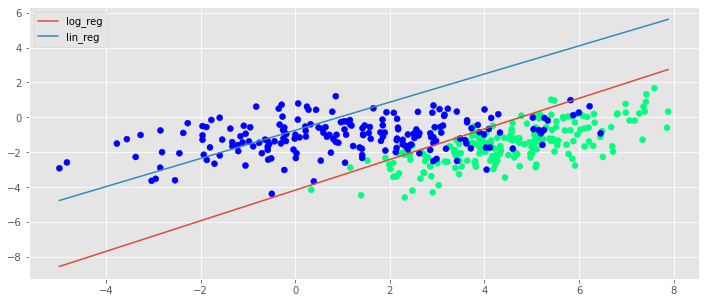

In [7]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]

plt.scatter(X[:,0], X[:,1], c=y, cmap='winter')
log_reg = MySGDClassifier(batch_generator, max_epoch=1000, model_type='log_reg', C=1000)
log_reg.fit(X, y)
plot_decision_boundary(log_reg)
lin_reg = MySGDClassifier(batch_generator, max_epoch=1000, model_type='lin_reg', C=1000)
lin_reg.fit(X, y)
plot_decision_boundary(lin_reg)

Далее будем анализировать Ваш алгоритм. 
Для этих заданий используйте датасет ниже.

In [8]:
from sklearn.datasets import make_classification

In [9]:
X, y = make_classification(n_samples=100000, n_features=10, 
                           n_informative=4, n_redundant=0, 
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)

Покажите сходимости обеих регрессией на этом датасете: изобразите график  функции потерь, усредненной по $N$ шагам градиентого спуска, для разных `alpha` (размеров шага). Разные `alpha` расположите на одном графике. 

$N$ можно брать 10, 50, 100 и т.д. 

[]

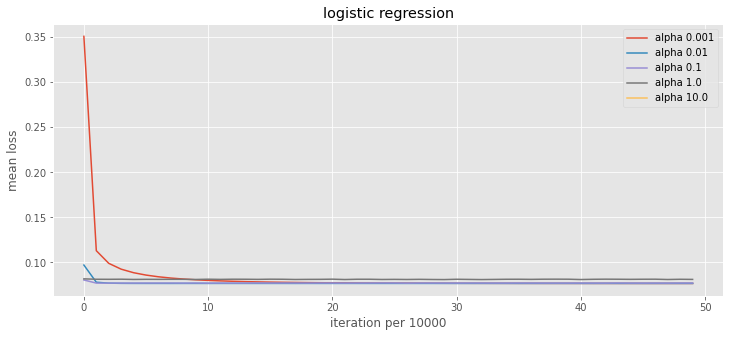

In [10]:
N = 10000
x = list(range(50))
for alpha in np.logspace(-3, 1, 5):
    mean_loss = []
    log_reg = MySGDClassifier(batch_generator, max_epoch=50, model_type='log_reg', C=1000, alpha=alpha)
    log_reg.fit(X, y)
    for i in range(0, len(log_reg.errors_log['loss']), N):
        mean_loss.append(np.mean(log_reg.errors_log['loss'][i:i+N]))
    plt.plot(x, mean_loss, label=f"alpha {alpha}")
plt.title('logistic regression')
plt.ylabel('mean loss')
plt.xlabel('iteration per 10000')
plt.legend()
plt.plot()

[]

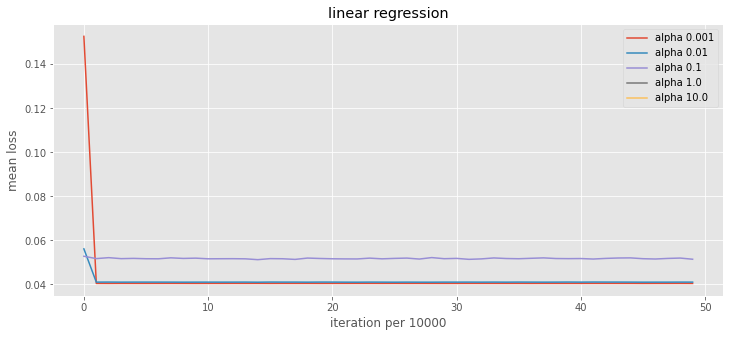

In [12]:
N = 10000
x = list(range(50))
for alpha in np.logspace(-3, 1, 5):
    mean_loss = []
    log_reg = MySGDClassifier(batch_generator, max_epoch=50, model_type='lin_reg', C=1000, alpha=alpha)
    log_reg.fit(X, y)
    for i in range(0, len(log_reg.errors_log['loss']), N):
        mean_loss.append(np.mean(log_reg.errors_log['loss'][i:i+N]))
    plt.plot(x, mean_loss, label=f"alpha {alpha}")
plt.title('linear regression')
plt.ylabel('mean loss')
plt.xlabel('iteration per 10000')
plt.legend()
plt.plot()

Что Вы можете сказать про сходимость метода при различных `alpha`? Какое значение стоит выбирать для лучшей сходимости?

***Ответ***: <br>
1. Логистическая регрессия плохо сходится при альфа 1.0 и выше, лучше всего при альфа 0.1 и 0.01. <br>
2. Линейная регрессия плохо сходится уже при альфа 0.1, лучше всего при альфа 0.01.

Изобразите график среднего значения весов для обеих регрессий в зависимости от коеф. регуляризации С из `np.logspace(3, -3, 10)` 

[]

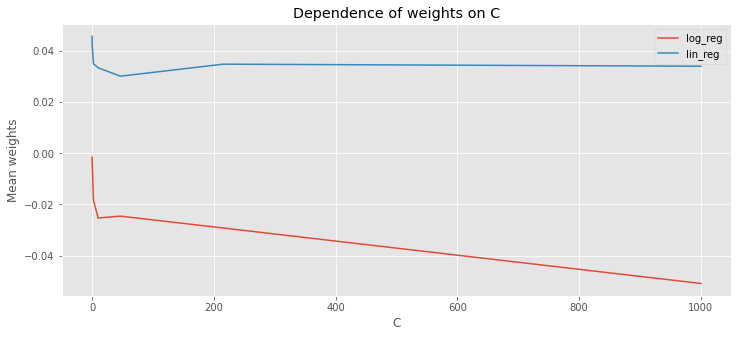

In [13]:
log_weights = []
lin_weights = []
for C in np.logspace(3, -3, 10):
    log_reg = MySGDClassifier(batch_generator, max_epoch=50, model_type='log_reg', alpha=0.01, C=C)
    log_reg.fit(X, y)
    log_weights.append(np.mean(log_reg.weights))
    lin_reg = MySGDClassifier(batch_generator, max_epoch=50, model_type='lin_reg', alpha=0.01, C=C)
    lin_reg.fit(X, y)
    lin_weights.append(np.mean(lin_reg.weights))
plt.plot(np.logspace(3, -3, 10), log_weights, label='log_reg')
plt.plot(np.logspace(3, -3, 10), lin_weights, label='lin_reg')
plt.title('Dependence of weights on C')
plt.xlabel('C')
plt.ylabel('Mean weights')
plt.legend()
plt.plot()

Довольны ли Вы, насколько сильно уменьшились Ваши веса? 

***Ответ***: да, вроде все хорошо.

# Боевое применение (4  балла)

**Защита данной части возможна только при преодолении в проекте бейзлайна Handmade baseline.**

Давайте применим модель на итоговом проекте! Датасет сделаем точно таким же образом, как было показано в project_overview.ipynb

Применим обе регрессии, подберем для них параметры и сравним качество. Может быть Вы еще одновременно с решением домашней работы подрастете на лидерборде!

In [14]:
doc_to_title = {}
with open('../project/data/docs_titles.tsv', encoding='utf-8') as f:
    for num_line, line in enumerate(f):
        if num_line == 0:
            continue
        data = line.strip().split('\t', 1)
        doc_id = int(data[0])
        if len(data) == 1:
            title = ''
        else:
            title = data[1]
        doc_to_title[doc_id] = title
print (len(doc_to_title))


28026


In [15]:
import pandas as pd
train_data = pd.read_csv('../project/data/train_groups.csv')
traingroups_titledata = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    target = new_doc['target']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))

In [16]:
import numpy as np
y_train = []
X_train = []
groups_train = []
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        y_train.append(target_id)
        groups_train.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_train.append(sorted(all_dist, reverse=True)[0:15]    )
X_train = np.array(X_train)
y_train = np.array(y_train)
groups_train = np.array(groups_train)
print (X_train.shape, y_train.shape, groups_train.shape)

(11690, 15) (11690,) (11690,)


Подберите размер батча для обучения. Линейная модель не должна учиться дольше нескольких минут. 

Не забывайте использовать скейлер!

In [17]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [18]:
X_train = StandardScaler().fit_transform(X_train)

In [19]:
log_reg = MySGDClassifier(batch_generator, batch_size=1, max_epoch=500, model_type='log_reg')
%time log_reg.fit(X_train, y_train)

log_reg = MySGDClassifier(batch_generator, batch_size=10, max_epoch=500, model_type='log_reg')
%time log_reg.fit(X_train, y_train)

log_reg = MySGDClassifier(batch_generator, batch_size=50, max_epoch=500, model_type='log_reg')
%time log_reg.fit(X_train, y_train)

Wall time: 3min 58s
Wall time: 25.9 s
Wall time: 5.77 s


MySGDClassifier(batch_generator=<function batch_generator at 0x00000240BCE5B3A8>,
                batch_size=50, max_epoch=500, model_type='log_reg')

***Мысль***: возьму пока batch_size=10, далее уточню.

Разбейте данные на обучение и валидацию. Подберите параметры C, alpha, max_epoch, model_type на валидации (Вы же помните, как правильно в этой задаче делать валидацию?)

In [20]:
from sklearn.model_selection import KFold

In [56]:
def C_estimation():
    kf = KFold(n_splits=5)
    scores = []
    for C in np.logspace(1, -2, 15):
        cscore = []
        log_reg = MySGDClassifier(batch_generator, C=C, max_epoch=20, alpha=0.0001, batch_size=10, model_type='log_reg')
        for train_index, test_index in kf.split(X_train):
            data_train, data_test = X_train[train_index], X_train[test_index]
            target_train, target_test = y_train[train_index], y_train[test_index]
            log_reg.fit(data_train, target_train)
            pred = log_reg.predict(data_test)
            cscore.append(f1_score(target_test, pred) / 5)
        cscore = np.sum(cscore)
        scores.append(cscore)
        print(f"C = {C}, score = {cscore}")
    return scores
log_reg_c = C_estimation()

C = 10.0, score = 0.5485661482186641
C = 6.1054022965853285, score = 0.5942249860492577
C = 3.72759372031494, score = 0.5557624271655766
C = 2.2758459260747887, score = 0.5603913169950415
C = 1.3894954943731377, score = 0.48571181745308645
C = 0.8483428982440722, score = 0.5195740562611684
C = 0.5179474679231213, score = 0.4175158956890522
C = 0.31622776601683794, score = 0.3993363047173424
C = 0.19306977288832505, score = 0.24356131445679177
C = 0.11787686347935879, score = 0.1692197616468039
C = 0.07196856730011521, score = 0.2849209525418198
C = 0.043939705607607904, score = 0.11415797317436663
C = 0.026826957952797274, score = 0.31488423418009664
C = 0.016378937069540647, score = 0.10600312310866346
C = 0.01, score = 0.030723781388478578


In [58]:
def alpha_estimation():
    kf = KFold(n_splits=5)
    scores = []
    for alpha in np.logspace(-1, -6, 15):
        alphascore = []
        log_reg = MySGDClassifier(batch_generator, alpha=alpha, C=6,
                                  max_epoch=20, batch_size=10, model_type='log_reg')
        for train_index, test_index in kf.split(X_train):
            data_train, data_test = X_train[train_index], X_train[test_index]
            target_train, target_test = y_train[train_index], y_train[test_index]
            log_reg.fit(data_train, target_train)
            pred = log_reg.predict(data_test)
            alphascore.append(f1_score(target_test, pred) / 5)
        alphascore = np.sum(alphascore)
        scores.append(alphascore)
        print(f"alpha = {alpha}, score = {alphascore}")
    return scores
log_reg_alpha = alpha_estimation()

alpha = 0.1, score = 0.41643168194859953
alpha = 0.043939705607607904, score = 0.4720151508164777
alpha = 0.019306977288832496, score = 0.4848161662974665
alpha = 0.008483428982440725, score = 0.4722139325938537
alpha = 0.003727593720314938, score = 0.48837568502381634
alpha = 0.0016378937069540646, score = 0.48442458467347754
alpha = 0.0007196856730011522, score = 0.5082319424382734
alpha = 0.00031622776601683794, score = 0.559992393973171
alpha = 0.00013894954943731373, score = 0.5634688930012424
alpha = 6.105402296585326e-05, score = 0.5802412624699761
alpha = 2.6826957952797274e-05, score = 0.3858879470740786
alpha = 1.1787686347935867e-05, score = 0.40637792740917733
alpha = 5.179474679231212e-06, score = 0.3847509400858956
alpha = 2.2758459260747865e-06, score = 0.3599156790212781
alpha = 1e-06, score = 0.3045858027905646


In [59]:
def max_epoch_estimation():
    kf = KFold(n_splits=5)
    scores = []
    for max_epoch in range(0, 301, 50):
        epochscore = []
        log_reg = MySGDClassifier(batch_generator, max_epoch=max_epoch, batch_size=10,
                                  alpha=0.0001, C=6, model_type='log_reg')
        for train_index, test_index in kf.split(X_train):
            data_train, data_test = X_train[train_index], X_train[test_index]
            target_train, target_test = y_train[train_index], y_train[test_index]
            log_reg.fit(data_train, target_train)
            pred = log_reg.predict(data_test)
            epochscore.append(f1_score(target_test, pred) / 5)
        epochscore = np.sum(epochscore)
        scores.append(epochscore)
        print(f"max_epoch = {max_epoch}, score = {epochscore}")
    return scores
log_reg_max_epoch = max_epoch_estimation()

max_epoch = 0, score = 0.43634295321677175
max_epoch = 50, score = 0.5672960731530081
max_epoch = 100, score = 0.5216031077076896
max_epoch = 150, score = 0.500179121595325
max_epoch = 200, score = 0.49182477191003976
max_epoch = 250, score = 0.4849735066207803
max_epoch = 300, score = 0.48405885554165246


Подберите порог линейной модели, по достижении которого, Вы будете относить объект к классу 1. Вспомните, какую метрику мы оптимизируем в соревновании.  Как тогда правильно подобрать порог?

In [60]:
def threshold_estimation():
    kf = KFold(n_splits=5)
    scores = []
    for threshold in np.linspace(0.1, 0.9, 9):
        thrscore = []
        log_reg = MySGDClassifier(batch_generator, max_epoch=50, batch_size=10,
                                  alpha=0.0001, C=6, model_type='log_reg', threshold=threshold)
        for train_index, test_index in kf.split(X_train):
            data_train, data_test = X_train[train_index], X_train[test_index]
            target_train, target_test = y_train[train_index], y_train[test_index]
            log_reg.fit(data_train, target_train)
            pred = log_reg.predict(data_test)
            thrscore.append(f1_score(target_test, pred) / 5)
        thrscore = np.sum(thrscore)
        scores.append(thrscore)
        print(f"threshold = {threshold}, score = {thrscore}")
    return scores
log_reg_threshold = threshold_estimation()

threshold = 0.1, score = 0.44450526537152873
threshold = 0.2, score = 0.4996125752590646
threshold = 0.30000000000000004, score = 0.5788544514133065
threshold = 0.4, score = 0.597048198671877
threshold = 0.5, score = 0.547812638896807
threshold = 0.6, score = 0.4627365045181683
threshold = 0.7000000000000001, score = 0.4088027473331874
threshold = 0.8, score = 0.24731368863081651
threshold = 0.9, score = 0.05846945262244149


In [201]:
kf =KFold(n_splits=5)
score = []
for train_index, test_index in kf.split(X_train):
    log_reg = MySGDClassifier(batch_generator, max_epoch=50, batch_size=10,
                          alpha=0.0008, C=100, threshold=0.3, model_type='log_reg')
    data_train, data_test = X_train[train_index], X_train[test_index]
    target_train, target_test = y_train[train_index], y_train[test_index]
    log_reg.fit(data_train, target_train)
    pred = log_reg.predict(data_test)
    score.append(f1_score(target_test, pred) / 5)
score = np.sum(score)
print(f"Final test, score = {score}")

Final test, score = 0.6110694027641328


***Мысль***: лучшие параметры для логистической регресии -- alpha=0.0008, threshold=0.3, max_epoch=50, C=100

---

Дальше код для кэггла...

In [197]:
log_reg = MySGDClassifier(batch_generator, max_epoch=50, batch_size=10,
                          alpha=0.00008, C=100, threshold=0.3, model_type='log_reg')
log_reg.fit(X_train, y_train)

MySGDClassifier(C=100, alpha=8e-05,
                batch_generator=<function batch_generator at 0x00000240D8C264C8>,
                max_epoch=50, model_type='log_reg', threshold=0.3)

In [202]:
test_data = pd.read_csv('../project/data/test_groups.csv')
testgroups_titledata = {}
for i in range(len(test_data)):
    new_doc = test_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    pair_id = new_doc['pair_id']
    title = doc_to_title[doc_id]
    if doc_group not in testgroups_titledata:
        testgroups_titledata[doc_group] = []
    testgroups_titledata[doc_group].append((doc_id, title, pair_id))

In [203]:
test_data.tail()

,pair_id,group_id,doc_id
16622,28313,309,16637
16623,28314,309,16759
16624,28315,309,15358
16625,28316,309,17287
16626,28317,309,16026


In [204]:
X_test = []
pair_ids = []
for new_group in testgroups_titledata:
    docs = testgroups_titledata[new_group]
    for k, (doc_id, title, pair_id) in enumerate(docs):
        pair_ids.append(pair_id)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, pair_id_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_test.append(sorted(all_dist, reverse=True)[0:15]    )
X_test = np.array(X_test)
print(X_test.shape, X_test[-5:], pair_ids[-5:])

(16627, 15) [[ 3  2  2  2  2  2  2  2  2  2  1  1  1  1  1]
 [ 4  3  2  2  2  2  2  2  2  2  1  1  1  1  1]
 [ 5  4  4  4  3  3  3  3  3  2  2  2  2  2  2]
 [ 3  3  3  3  3  3  2  2  2  2  2  2  2  2  2]
 [14 14 14  4  4  3  3  3  3  2  2  2  2  2  2]] [28313, 28314, 28315, 28316, 28317]


In [205]:
X_test = StandardScaler().fit_transform(X_test)

In [206]:
predict = log_reg.predict(X_test)
print(predict.shape)

(16627,)


In [207]:
predict_data = {'pair_id': pair_ids,
                'target': predict}
predict_submission = pd.DataFrame(predict_data)
predict_submission.head()

,pair_id,target
0,11691,0
1,11692,0
2,11693,1
3,11694,1
4,11695,1


In [208]:
predict_submission.to_csv(r'C:\Users\markp\ml-sphere\project\predictions\predict_submission1.csv', index=False, header=True)

С лучшими параметрами на валидации сделайте предсказание на тестовом множестве, отправьте его на проверку на платформу kaggle. Убедитесь, что Вы смогли побить public score первого бейзлайна.

** При сдаче домашки Вам необходимо кроме ссылки на ноутбук показать Ваш ник на kaggle, под которым Вы залили решение, которое побило Handmade baseline. **

***Ник Marko Prikhno, team ABOBA, score: 0.60346***

# Фидбек (бесценно)

* Какие аспекты обучения линейных моделей Вам показались непонятными? Какое место стоит дополнительно объяснить?

***Ваше ответ здесь***

* Здесь Вы можете оставить отзыв о этой домашней работе или о всем курсе.   

*** ВАШ ОТЗЫВ ЗДЕСЬ***